# Linear Regression with OLS



In [ ]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("housing_price_data.csv")

df.head()

,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


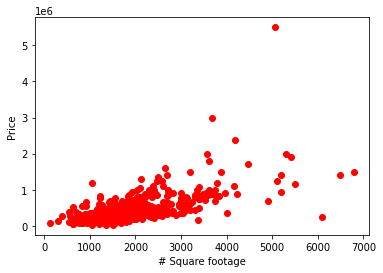

In [ ]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# plots the data points
plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [ ]:
# Normalize the house size, e.g., subtract min and divide by (max-min) to ensure 
# the scale is compatible with the bias, which is 1
max_min = X.max(0) - X.min(0)
Xmin = X.min(0)
X = (X-Xmin) / max_min

# Add bias
z=np.ones((len(X),1)) 
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)                
y = y.reshape(len(X),1) 

# sort for testing/plotting
Xsort = np.sort(X, axis=0)

print(X.shape)
print(y.shape)

(781, 2)
(781, 1)


## **OLS METHOD**

In [ ]:
# Linear Regression by Ordinary Least Squares method
# TO DO: compute w_ols
## Your code goes here ...
# Linear Regression by Ordinary Least Squares method
# Compute w_ols
Xt = np.transpose(X)
w_ols = np.linalg.inv(Xt @ X) @ Xt @ y

In [ ]:
# TO DO: Predict the price of a 5000 sqft house
### Remember to normalize it first
## Your code goes here ...
size = np.array([[5000]])
size = (size - Xmin) / max_min
size = np.concatenate((np.array([[1]]), size), axis=1)
price = size @ w_ols

print("Predicted price of a 5000 sqft house:", price[0][0])


Predicted price of a 5000 sqft house: 1301938.0777535713


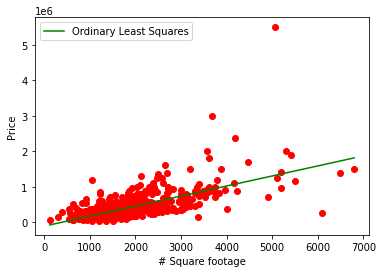

In [ ]:
### Plot fitted curve

yhat_ols = np.dot(np.sort(X, axis=0),w_ols)

plt.plot(X[:,1] * max_min + Xmin, y, 'ro')
plt.plot(Xsort[:,1] *max_min + Xmin, yhat_ols, 'g', label="Ordinary Least Squares")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()
